# Image Generator
test module development

In [1]:
import os
import sys
import inspect
from pathlib import Path

# path = str(Path(os.path.dirname(os.path.abspath(
#            inspect.getfile(inspect.currentframe())))).parent.parent)
# sys.path.insert(0, path) if path not in sys.path else None

%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # stupid matplotlib deprecation warnings... need to clear this some day

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from characterization_ams.stats_engine.tests import image_generator as ig

def imshows(frames, colorbar=True, cmap='viridis', isgrid=False):
    # this throws a bunch of deprecation warnings on newer matplotlib versions
    # need to clean up someday
    frames = [frames] if not isinstance(frames, list) else frames
    n = len(frames)
    fig = plt.figure(num=1, figsize=(8, 4. * n))
    
    grids = ImageGrid(fig=fig, rect=111,                     
                     nrows_ncols=(n, 1),
                     direction="row",
                     axes_pad=0.05,
                     add_all=True,
                     label_mode="1",
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="each",
                     cbar_size="7%",
                     cbar_pad="1%",                      
                    )
    
    for i, grid in enumerate(grids):
        im = grid.imshow(frames[i], cmap=cmap)
        grid.grid(isgrid)
        grid.cax.colorbar(im) if colorbar else None  
        #fig.colorbar(im, ax=grid)  # this looks like shit and needs to be customized


ModuleNotFoundError: No module named 'characterization_ams.stats_engine.tests'

## gen_image
single image / frame generation

#### row noise

96.70394771137059
0.0
96.70394771137056


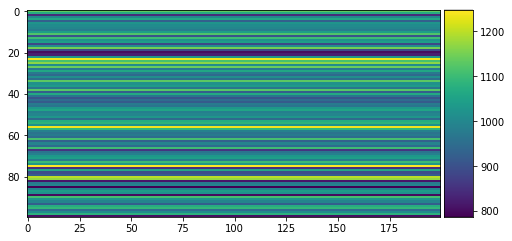

In [2]:
im = ig.gen_image(row_scale=100, pedestal=1000)
imshows(im)
print(im.std())
print(im.mean(axis=0).std())
print(im.mean(axis=1).std())

#### col noise

97.62434110597847
97.62434110597846
1.7763568394002505e-15


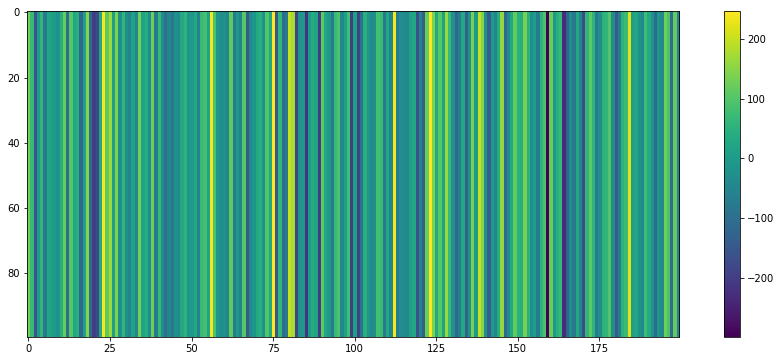

In [3]:
img = ig.gen_image(col_scale=100)
fig, ax = plt.subplots(figsize=(16, 6))
im = ax.imshow(img)
fig.colorbar(im)
print(img.std())
print(img.mean(axis=0).std())
print(img.mean(axis=1).std())

#### pixel noise

99.83005340618836
10.804546395864369
6.889000661709385


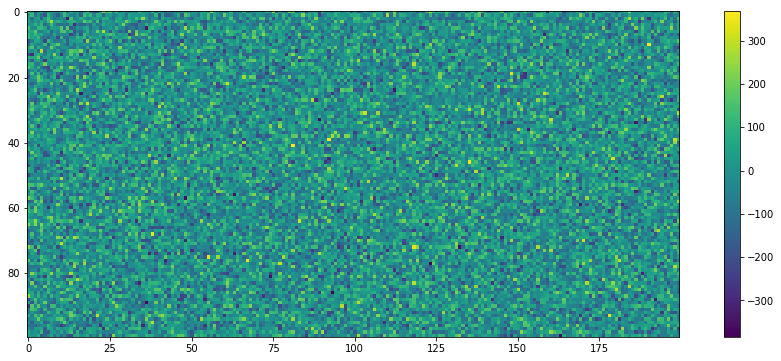

In [4]:
img = ig.gen_image(pix_scale=100)
fig, ax = plt.subplots(figsize=(16, 6))
im = ax.imshow(img)
fig.colorbar(im)
print(img.std())
print(img.mean(axis=0).std())
print(img.mean(axis=1).std())

#### all

236.4121991116093
191.61729669285566
96.71686905239069


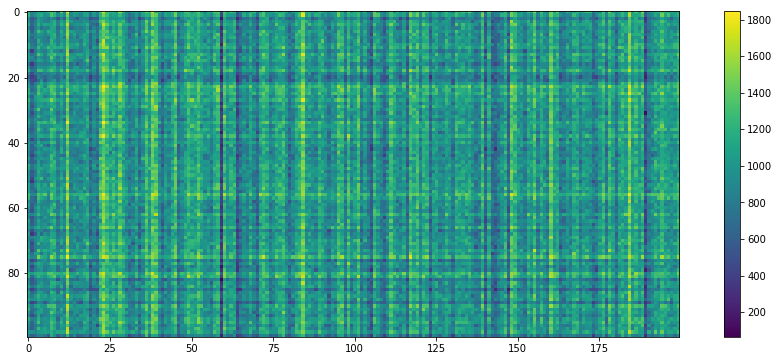

In [5]:
img = ig.gen_image(row_scale=100, col_scale=200, pix_scale=100, pedestal=1000)
fig, ax = plt.subplots(figsize=(16, 6))
im = ax.imshow(img)
fig.colorbar(im)
print(img.std())
print(img.mean(axis=0).std())
print(img.mean(axis=1).std())

## gen_images
generate frameset including both temporal and fixed pattern noise

### base 

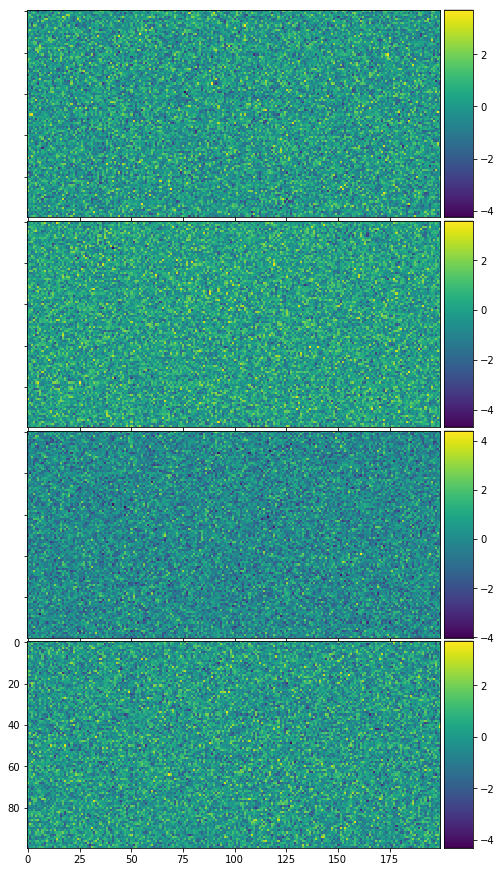

In [6]:
ims = ig.gen_images(ptn=1)
imshows(ims)

### fpn 

#### cfpn 

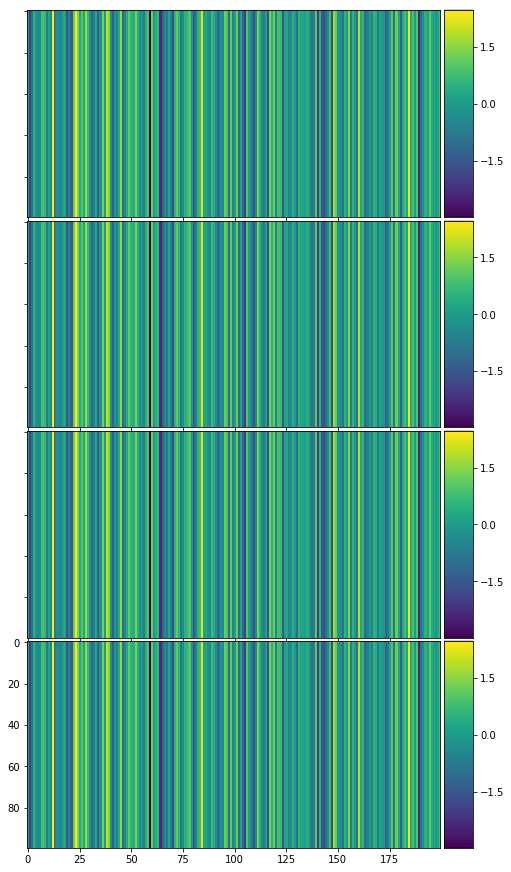

In [7]:
ims = ig.gen_images(cfpn=1)
imshows(ims)

#### rfpn 

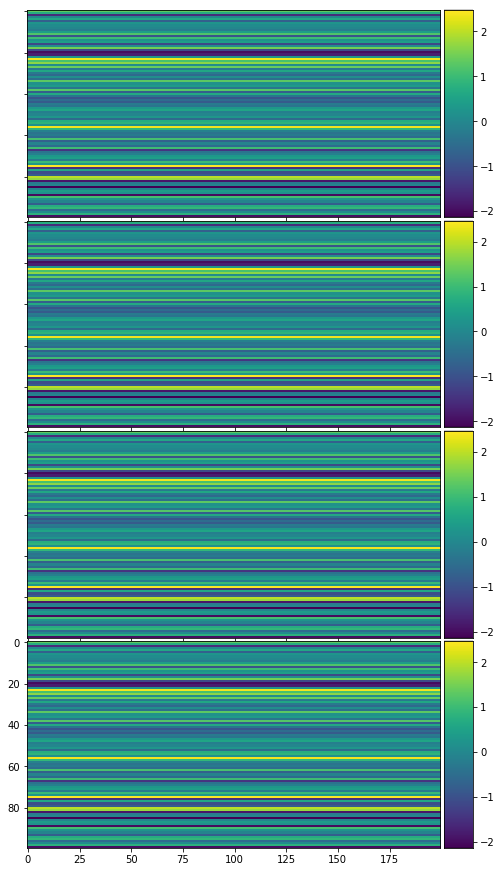

In [8]:
ims = ig.gen_images(rfpn=1)
imshows(ims)

#### pfpn 

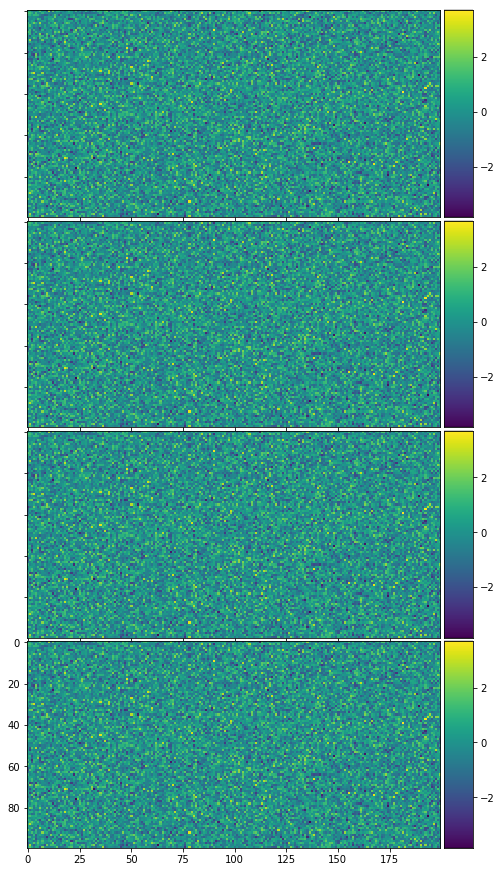

In [50]:
ims = ig.gen_images(pfpn=1)
imshows(ims)

#### all 

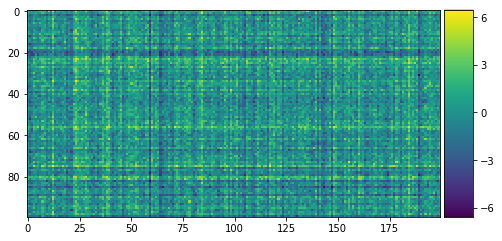

In [24]:
img = ig.gen_images(rfpn=1, cfpn=1, pfpn=1, n_images=1)
imshows(ims)

#### fixed seed 

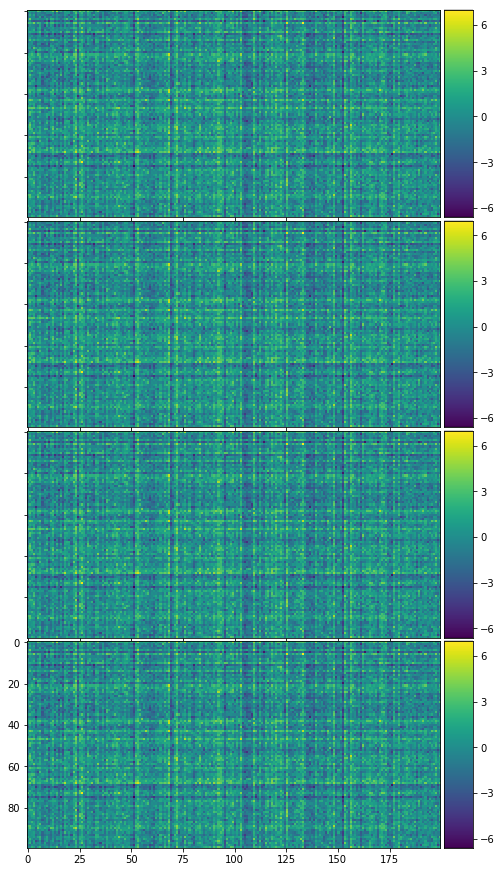

In [11]:
ims = ig.gen_images(rfpn=1, cfpn=1, pfpn=1, seed_fpn=1)
imshows(ims)
assert (ims[0] == ims[1]).all()

### temporal noise

#### ctn

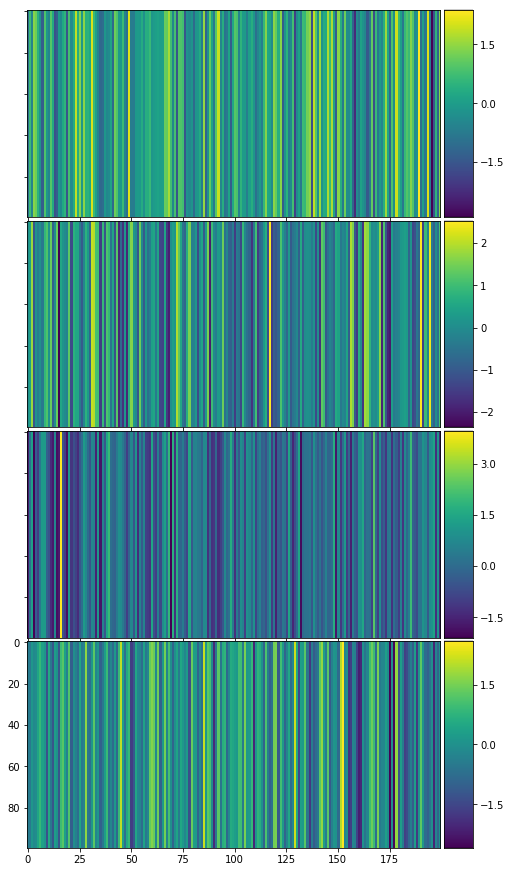

In [19]:
ims = ig.gen_images(ctn=1)
imshows(ims)

#### rtn

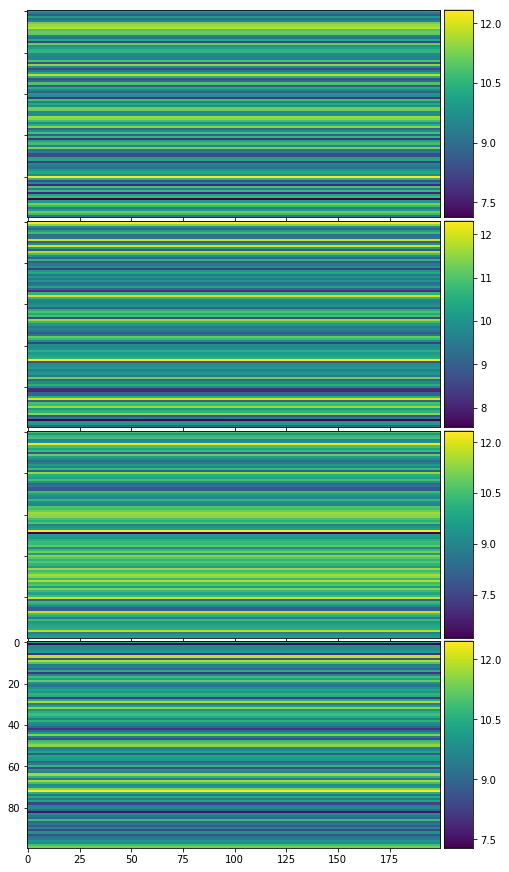

In [25]:
ims = ig.gen_images(rtn=1, pedestal=10)
imshows(ims)

#### ptn

In [32]:
ims = ig.gen_images(ptn=1, pedestal=10)
imshows(ims)

> c:\workspace\stats_engine\tests\image_generator.py(54)gen_image()
-> img += noise_func(loc=0, scale=pix_scale, size=(rows, cols))
(Pdb) x
*** NameError: name 'x' is not defined
(Pdb) c
> c:\workspace\stats_engine\tests\image_generator.py(54)gen_image()
-> img += noise_func(loc=0, scale=pix_scale, size=(rows, cols))
(Pdb) noise_func
<built-in method normal of mtrand.RandomState object at 0x0000024CDB501EE8>
(Pdb) noise_func(loc=0, scale=pix_scale, size=(rows, cols))
array([[-0.11040672, -1.87060549,  0.9088904 , ..., -0.62962084,
         0.85438946, -0.15083577],
       [ 0.17172831,  1.45064769, -0.35305454, ...,  1.39355396,
         0.63959891,  0.46375695],
       [ 1.01484103,  1.73169157,  0.88130597, ...,  0.11275689,
        -0.05540642,  1.55227049],
       ...,
       [-0.64321524,  0.84888367, -0.56998213, ...,  1.16395042,
        -0.13762771,  1.13434553],
       [ 0.42702234,  2.17558085, -0.20920532, ..., -0.15482411,
         0.08948998,  1.73198875],
       [-0.49617

BdbQuit: 

In [30]:
np.var(ims, axis=2).mean()

0.9876719824111359

#### all 

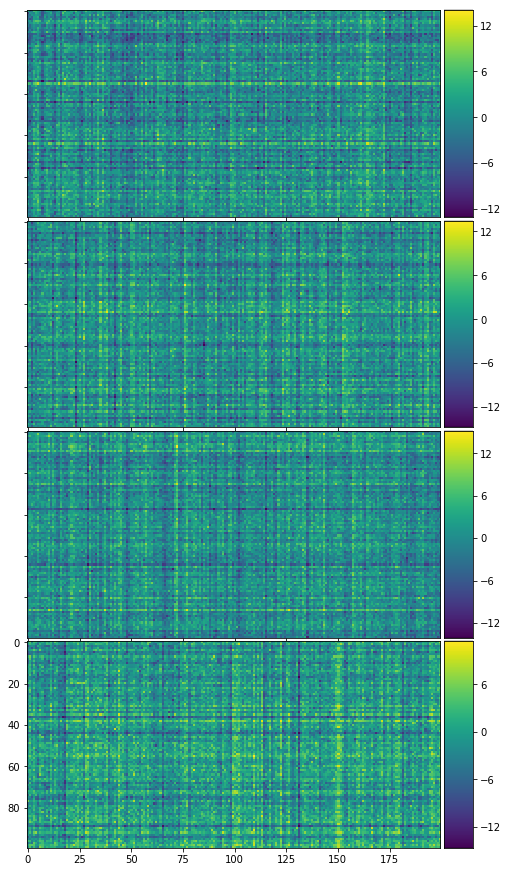

In [15]:
ims = ig.gen_images(ctn=2, rtn=2, ptn=2)
imshows(ims)

### fpn + tn

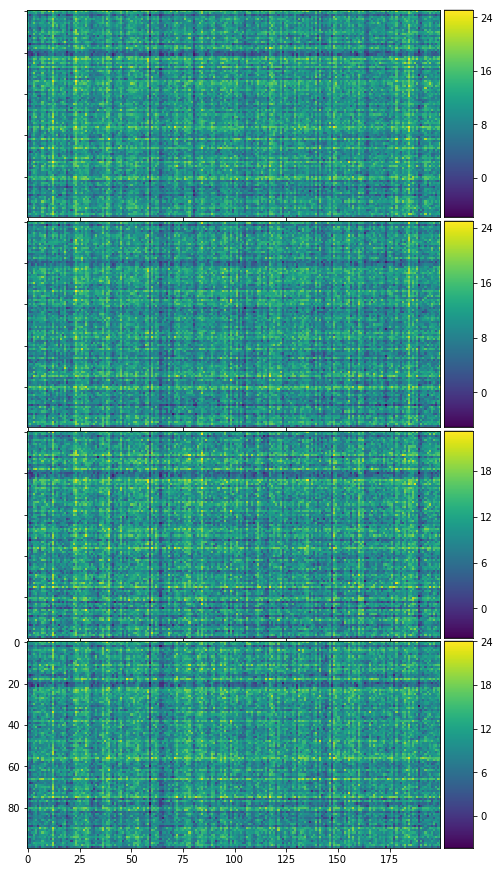

In [16]:
ims = ig.gen_images(cfpn=2, rfpn=2, pfpn=2, ctn=1, rtn=1, ptn=1, pedestal=10)
imshows(ims)

### fixed seeds

15.245780065633253


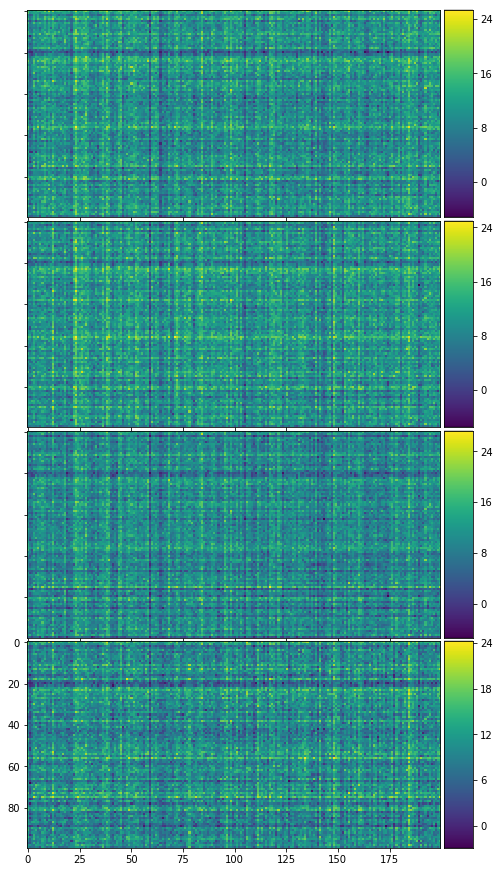

In [21]:
seeds = range(4)
ims = ig.gen_images(cfpn=2, rfpn=2, pfpn=2, ctn=1, rtn=1, ptn=1, pedestal=10, seeds_temporal=seeds)
imshows(ims)
sm = sum([im.std() for im in ims])
print(sm)
assert sm == 15.245780065633253